<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE60499](https://ndcbe.github.io/CBE60499);
content is available [on Github](git@github.com:ndcbe/CBE60499.git).*


<!--NAVIGATION-->
| [Contents](toc.html) | [Tag Index](tag_index.html) | [1.1 60 Minutes to Pyomo: An Energy Storage Model Predictive Control Example](https://ndcbe.github.io/CBE60499/01.01-Pyomo-Nuts-and-Bolts.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 1.0 Getting Started with Pyomo

## 1.0.1 Local Installation

### 1.0.1.1 Install anaconda

Anaconda is a Python distribution that supports the `conda` package manager and environments. Follow these steps if you do not have anaconda or miniconda already installed:
* https://docs.anaconda.com/anaconda/install/
* https://docs.conda.io/en/latest/miniconda.html

### 1.0.1.2 Create a new conda environment

`conda` envirorments allow us to maintain several difference Python installations on our computer. This allows for easy switching between Python versions or different versions of Python packages. Using an environment will ensure anything we install for this class does not disrupt your other Python workflows.

After installing `conda`, run this command in the terminal:

```
conda create --name spring2021 python=3.8
```

This creates an environment called `spring2021`. Next we need to activate it:

```
conda activate spring2021
```

Whenever you open a new terminal, you will likely need to activate our new environment.

### 1.0.1.3 Install IDAES-PSE

The IDAES-PSE toolset (Institute for the Design of Advanced Energy Systems - Process Systems Engineering) is an open-source framework for multiscale process modeling, optimization, and advanced analytics. The IDAES toolset is built on top of Pyomo. We'll mainly use Pyomo in this class, although we'll highlight a few IDAES capabilities.

To install `idaes`, run:

```
 conda install -c idaes-pse -c conda-forge idaes-pse
```

This command will install `idaes` as well as all of its dependencies, including `pyomo`.

After `conda` finishes, run:

```
idaes --version
```

To verify `idaes` is installed in your active environment.

### 1.0.1.4 Install Ipopt

**Windows and Linux users** - you are in luck. IDAES comes with a nonlinear optimization solver Ipopt compiled with the HSL linear algebra routines; I may refer to this as "good Ipopt". Later in the semester, we'll talk about why the linear alegbra library is important. To install the "good Ipopt", run:

```
idaes get-extensions
```

Linux users: you may need to install some dependencies too: https://idaes-pse.readthedocs.io/en/stable/getting_started/index.html#linux

This will install Ipopt in a hidden user folder. If you get the error `WARNING: Could not locate the 'ipopt' executable` add the line `import idaes` to the top of your notebook then restart the Python kernel. Our library `helper` takes care of adding Ipopt to the system path on Colab. If you use the instructions below, "okay" Ipopt will be installed.

**macOS users** - unfortunately, IDAES does not include binaries for "good Ipopt". You can either compile the solver yourself after obtaining an academic license for HSL or you can install the "okay Ipopt" using conda:

```
conda install -c conda-forge ipopt
```

### 1.0.1.5 Install Additional Solvers

In additional to `ipopt`, we will also use `glpk`. To install it, run:

```
conda install -c conda-forge glpk
```

You may also wish to install other commercial solvers, especially if you want to consider large mixed integer optimization problems for research. These solvers offer free academic licenses:
* CPLEX: https://www.ibm.com/products/ilog-cplex-optimization-studio
* Gurobi: https://www.gurobi.com/downloads/end-user-license-agreement-academic/

### 1.0.1.6 Install Notebook Spellcheker

Here is a great Jupyter extension that adds a [spellchecker](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/spellchecker/README.html) to your notebooks. To install, run the following commands in the terminal (in your new conda environment):

```
conda install -c conda-forge jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable spellchecker/main
```


## 1.0.2 Cloud Computing with Google Colab

In [ ]:
## Tip: Please put code like this at the top of your notebook.
# We want all of the module/package installations to start up front

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py"
    import helper
    helper.install_idaes()
    helper.install_ipopt()

--2025-01-30 00:23:46--  https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7171 (7.0K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   7.00K  --.-KB/s    in 0s      

2025-01-30 00:23:46 (76.8 MB/s) - ‘helper.py’ saved [7171/7171]

Installing idaes via pip...
idaes was successfully installed
Running idaes get-extensions to install Ipopt, k_aug, and more...
Ipopt 3.13.2 (x86_64-pc-linux-gnu), ASL(20190605)

[K_AUG] 0.1.0, Part of the IDAES PSE framework
Please visit https://idaes.org/ (x86_64-pc-linux-gnu), ASL(20190605)

Couenne 0.5.8 -- an Open-Source solver for Mixed Integer Nonlinear Optimization
Mailing list: couenne@list.coin-or.org
Instructions

## 1.0.3 Your First Optimization Problem


--- NumPy Test ---
Array: [1 2 3 4 5]
Sum of array: 15
Mean of array: 3.0
-----------------


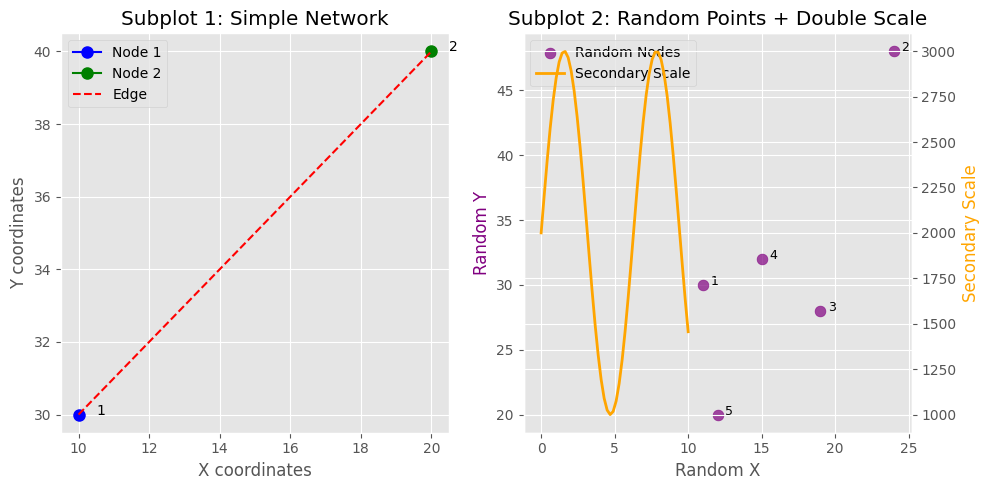

            Brand  Price
0     Honda Civic  22000
1  Toyota Corolla  25000
2      Ford Focus  27000
3         Audi A4  35000

Example of math.ceil(10.3) -> 11


In [ ]:
"""
Created on Jan 19 11:07:58 2025

@author:
  - Gérman Montoya
  - Juan Andrés Mendez

A class-based script that demonstrates:
 1. How to check Python dependencies (numpy, pandas, matplotlib).
 2. How to draw a simple network with matplotlib.
 3. How to create and display a pandas DataFrame.
 4. How to use the math.ceil function in a demonstration.
 5. How to perform a small test in numpy.

Run:
  python your_file.py
"""

import importlib
import math

class NetworkPlotExample:
    """
    A class demonstrating how to:
    1. Check for missing dependencies (numpy, pandas, matplotlib).
    2. Draw a simple network (one or more points, potentially connected by an edge).
    3. Create and print a sample pandas DataFrame.
    4. Demonstrate usage of math.ceil (and other simple math).
    5. Perform a small numpy test (creating an array and computing stats).

    Attributes
    ----------
    dependencies : list of str
        A list of Python package names required by this demonstration code.
    """

    def __init__(self):
        """
        Initialize the demonstration class with the required dependencies
        as a list of strings.
        """
        self.dependencies = ["numpy", "pandas", "matplotlib"]

    def check_dependencies(self):
        """
        Check whether required dependencies are installed.
        If not, raise an ImportError with instructions on how to install them.
        """
        for dep in self.dependencies:
            try:
                importlib.import_module(dep)
            except ImportError:
                raise ImportError(
                    f"Missing dependency '{dep}'. "
                    f"Please install it via 'pip install {dep}' or equivalent."
                )

    def numpy_test(self):
        """
        Perform a quick test with numpy to confirm it is installed and working.
        Creates an array and prints basic statistics.
        """
        import numpy as np
        arr = np.array([1, 2, 3, 4, 5])
        print("\n--- NumPy Test ---")
        print("Array:", arr)
        print("Sum of array:", np.sum(arr))
        print("Mean of array:", np.mean(arr))
        print("-----------------")

    def draw_network(self):
        """
        Draw a flashier network with matplotlib, showcasing:
          - Multiple subplots in one figure
          - Legends for nodes and edges
          - Custom colors and styles
          - Double scales (secondary y-axis) in a second subplot
        """
        import matplotlib.pyplot as plt
        import numpy as np
        import math

        # Use a different style if you want (e.g., 'seaborn', 'bmh', etc.)
        plt.style.use('ggplot')

        # Create a figure with 2 subplots side by side
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        # --------------------------------------------------------
        # Subplot 1: A simple network with labeled nodes and an edge
        # --------------------------------------------------------
        ax1 = axes[0]

        # Example coordinates for two nodes
        x1, y1 = 10, 30
        x2, y2 = 20, 40

        # Plot the first node
        ax1.plot(x1, y1, marker='o', color='blue', label='Node 1', markersize=8)
        ax1.text(x1 + 0.5, y1, "1", size=10)

        # Plot the second node
        ax1.plot(x2, y2, marker='o', color='green', label='Node 2', markersize=8)
        ax1.text(x2 + 0.5, y2, "2", size=10)

        # Draw an edge if the distance is below a threshold
        R_c = 15
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if dist <= R_c:
            ax1.plot([x1, x2], [y1, y2], 'r--', label='Edge')

        ax1.set_xlabel('X coordinates')
        ax1.set_ylabel('Y coordinates')
        ax1.set_title('Subplot 1: Simple Network')
        ax1.grid(True)
        ax1.legend(loc='best')

        # --------------------------------------------------------
        # Subplot 2: Another "network" with random points + double scale
        # --------------------------------------------------------
        ax2 = axes[1]

        # Generate random points for demonstration
        np.random.seed(42)  # For reproducible results
        X = np.random.randint(5, 25, size=5)
        Y = np.random.randint(10, 50, size=5)

        # Scatter plot of these points
        scatter = ax2.scatter(X, Y, c='purple', s=60, alpha=0.7, label='Random Nodes')
        # Label each point
        for i, (xx, yy) in enumerate(zip(X, Y), start=1):
            ax2.text(xx + 0.5, yy, str(i), fontsize=9)

        # Create a secondary y-axis for additional data
        ax2_b = ax2.twinx()
        # Example line plot on the secondary y-axis
        # We'll just use some artificial data here
        x_line = np.linspace(0, 10, 50)
        y_line = 1000 * np.sin(x_line) + 2000
        line2 = ax2_b.plot(x_line, y_line, color='orange', linewidth=2.0, label='Secondary Scale')

        ax2.set_xlabel('Random X')
        ax2.set_ylabel('Random Y', color='purple')
        ax2_b.set_ylabel('Secondary Scale', color='orange')

        ax2.set_title('Subplot 2: Random Points + Double Scale')
        ax2.grid(True)

        # Build legends for both the primary and secondary y-axes
        lines_1, labels_1 = ax2.get_legend_handles_labels()
        lines_2, labels_2 = ax2_b.get_legend_handles_labels()
        ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

        # --------------------------------------------------------
        # Adjust layout and show the figure
        # --------------------------------------------------------
        fig.tight_layout()
        plt.show()

    def show_cars_dataframe(self):
        """
        Create a sample Cars DataFrame using pandas and print it.
        """
        import pandas as pd

        Cars = {
            'Brand': ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
            'Price': [22000, 25000, 27000, 35000]
        }

        df = pd.DataFrame(Cars, columns=['Brand', 'Price'])
        print(df)

    def math_demo(self):
        """
        Demonstrate usage of math.ceil (and any other math functions).
        """
        a1 = math.ceil(10.3)
        print(f"\nExample of math.ceil(10.3) -> {a1}")

    def run_example(self):
        """
        Run all demonstrations in order:
         1. Numpy test
         2. Draw a simple network.
         3. Show a sample DataFrame.
         4. Demonstrate math functions.
        """
        self.numpy_test()
        self.draw_network()
        self.show_cars_dataframe()
        self.math_demo()

if __name__ == "__main__":
    # Create an instance of the example class
    demo = NetworkPlotExample()

    # 1. Check dependencies
    try:
        demo.check_dependencies()
    except ImportError as e:
        print(e)
        print("Please install the missing package(s) and re-run.")
        exit(1)

    # 2. Run all demonstrations
    demo.run_example()



In [ ]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, maximize
from pyomo.opt import SolverFactory
import pyomo.environ as pyo

class LinearOptimizationModel:
    """
    A class to set up and solve a simple linear optimization problem using Pyomo.

    Attributes:
    -----------
    solver_name : str
        The name of the solver to be used (default: 'glpk').
    model : ConcreteModel or None
        The Pyomo ConcreteModel instance. None before setup.
    results : SolverResults or None
        The results from solving the model. None before solve.
    """

    def __init__(self, solver_name='glpk'):
        """
        Initialize the model class with a chosen solver name.

        Parameters:
        -----------
        solver_name : str, optional
            The solver to use for solving the linear program (default is 'glpk').
        """
        self.solver_name = solver_name
        self.model = None
        self.results = None

    def setup_model(self):
        """
        Set up the Pyomo model with variables, objective function, and constraints.
        """
        # Create a Pyomo ConcreteModel
        self.model = ConcreteModel()

        # Define variables
        self.model.x = Var([1, 2], domain=pyo.NonNegativeReals)

        # Define objective function: maximize 3*x1 + 2*x2
        self.model.obj = Objective(
            expr=3 * self.model.x[1] + 2 * self.model.x[2],
            sense=maximize
        )

        # Define constraints
        self.model.res1 = Constraint(expr=2 * self.model.x[1] + self.model.x[2] <= 100)
        self.model.res2 = Constraint(expr=self.model.x[1] + self.model.x[2] <= 80)
        self.model.res3 = Constraint(expr=self.model.x[1] <= 40)

    def solve_model(self):
        """
        Solve the model using the specified solver, store, and return the results.

        Raises:
        -------
        ValueError
            If the model is not set up before attempting to solve.
        """
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' before solving.")

        # Create the solver instance
        solver = SolverFactory(self.solver_name)
        # Solve the model
        self.results = solver.solve(self.model)

        return self.results

    def display_results(self):
        """
        Display the model's results and decision variable values.

        If no results are available, prints a warning message.
        """
        if self.results is None:
            print("No results to display. Please solve the model first.")
        else:
            self.model.display()


# Example usage
if __name__ == "__main__":
    # Create an instance of the optimization model class with default solver
    linear_model = LinearOptimizationModel()

    # Set up the model
    linear_model.setup_model()

    # Solve the model
    solve_results = linear_model.solve_model()

    # Display the results
    linear_model.display_results()


Model unknown

  Variables:
    x : Size=2, Index={1, 2}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  20.0 :  None : False : False : NonNegativeReals
          2 :     0 :  60.0 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 180.0

  Constraints:
    res1 : Size=1
        Key  : Lower : Body  : Upper
        None :  None : 100.0 : 100.0
    res2 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 80.0 :  80.0
    res3 : Size=1
        Key  : Lower : Body : Upper
        None :  None : 20.0 :  40.0



================= Pyomo Model Output =================
Model unknown

  Variables:
    x : Size=25, Index=N*N
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   0.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   1.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   0.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   0.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 4) :     0 :   0.0 :     1 : False : False : Binary
        (2, 5) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   0.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : 

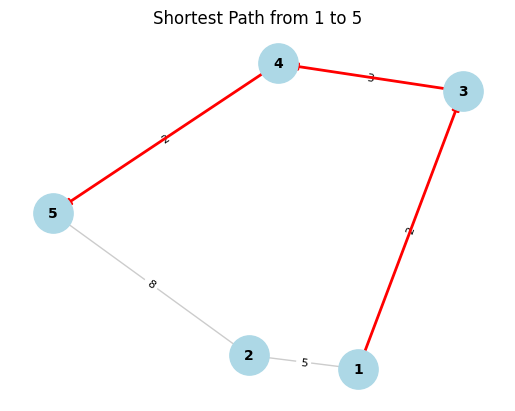

In [ ]:
from __future__ import division
import os

import networkx as nx
import matplotlib.pyplot as plt

from pyomo.environ import (
    ConcreteModel, Var, Objective, Constraint,
 RangeSet, SolverFactory, value
)

import pyomo.environ as pyo


class ShortestPathModel:
    """
    A class to set up and solve a shortest-path problem using Pyomo.

    This model finds a path from a specified origin to a specified destination
    with binary decision variables x[i, j] indicating whether the arc
    from i to j is used. The cost is minimized.
    """

    def __init__(self,
                 num_nodes=5,
                 large_constant=999,
                 solver_name='glpk',
                 origin=1,
                 destination=None):
        """
        Initialize the shortest path model with node count, a large constant
        for prohibitive costs, a chosen solver name, and the origin/destination
        nodes for the path.

        Parameters
        ----------
        num_nodes : int, optional
            Number of nodes in the network (default is 5).
        large_constant : int or float, optional
            A large constant to represent a prohibitively large cost (default is 999).
        solver_name : str, optional
            Name of the solver to use (default is 'glpk').
        origin : int, optional
            The node from which the path should start (default is 1).
        destination : int, optional
            The node at which the path should end. If None (default),
            it is assumed to be `num_nodes`.
        """

        # Store parameters
        self.num_nodes = num_nodes
        self.large_constant = large_constant
        self.solver_name = solver_name
        self.origin = origin
        self.destination = destination if destination is not None else num_nodes

        # Placeholders for Pyomo objects
        self.model = None
        self.results = None

    def setup_model(self):
        """
        Set up the ConcreteModel, define sets, variables, cost, objective, and constraints.
        """
        # Clear console (optional, as in your original code)
        os.system("clear")

        # Create the model
        self.model = ConcreteModel()

        # Sets
        self.model.N = RangeSet(1, self.num_nodes)

        # Cost dictionary (example matches your original code)
        # You could also make this cost data an argument if you need more flexibility.
        self.model.cost = {
            (1, 1): 999, (1, 2): 5,   (1, 3): 2,   (1, 4): 999, (1, 5): 999,
            (2, 1): 999, (2, 2): 999, (2, 3): 999, (2, 4): 999, (2, 5): 8,
            (3, 1): 999, (3, 2): 999, (3, 3): 999, (3, 4): 3,   (3, 5): 999,
            (4, 1): 999, (4, 2): 999, (4, 3): 999, (4, 4): 999, (4, 5): 2,
            (5, 1): 999, (5, 2): 999, (5, 3): 999, (5, 4): 999, (5, 5): 999
        }

        # Decision variables: x[i,j] in {0,1}
        self.model.x = Var(self.model.N, self.model.N, domain=pyo.Binary)

        # Objective: minimize total cost
        def obj_rule(m):
            return sum(m.x[i, j] * m.cost[i, j] for i in m.N for j in m.N)
        self.model.obj = Objective(rule=obj_rule)

        # Constraints
        def source_rule(m, i):
            # The origin node must have exactly one outgoing arc
            if i == self.origin:
                return sum(m.x[i, j] for j in m.N) == 1
            else:
                return Constraint.Skip

        self.model.source = Constraint(self.model.N, rule=source_rule)

        def destination_rule(m, j):
            # The destination node must have exactly one incoming arc
            if j == self.destination:
                return sum(m.x[i, j] for i in m.N) == 1
            else:
                return Constraint.Skip

        self.model.destination = Constraint(self.model.N, rule=destination_rule)

        def intermediate_rule(m, i):
            # Flow balance for intermediate nodes
            # (excluding the origin and destination)
            if i != self.origin and i != self.destination:
                return (sum(m.x[i, j] for j in m.N)
                        - sum(m.x[j, i] for j in m.N)) == 0
            else:
                return Constraint.Skip

        self.model.intermediate = Constraint(self.model.N, rule=intermediate_rule)

    def solve_model(self):
        """
        Solve the model using the specified solver and store the results.

        Raises
        ------
        ValueError
            If the model is not set up before solving.
        """
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' first.")

        # Create and invoke solver
        solver = SolverFactory(self.solver_name)
        self.results = solver.solve(self.model)

        return self.results

    def display_results(self):
        """
        Display the model's results, including variable values.
        """
        if not self.results:
            print("No results found. Please solve the model first.")
            return

        print("\n================= Pyomo Model Output =================")
        self.model.display()

        # Optional: Print arcs used in the solution
        print("\nArcs used in the solution (x[i, j] = 1):")
        used_edges = []
        for i in self.model.N:
            for j in self.model.N:
                if value(self.model.x[i, j]) == 1:
                    used_edges.append((i, j))
                    print(f"x[{i},{j}] = 1")

        if not used_edges:
            print("No edges were used. Possibly no valid path was found.")

    def plot_solution(self):
        """
        Plot the network graph using networkx.
        Any arc with cost < large_constant is considered feasible.
        The edges selected in the solution are highlighted in red.
        """
        if self.model is None:
            print("Model is not set up. Please call 'setup_model()' first.")
            return
        if not self.results:
            print("No solution to plot. Please solve the model first.")
            return

        # Build a directed graph based on the cost dictionary
        G = nx.DiGraph()
        for (i, j), c in self.model.cost.items():
            # Only add edges that are not 'prohibitively large'
            if c < self.large_constant:
                G.add_edge(i, j, weight=c)

        # Identify used edges based on x[i,j] = 1
        used_edges = [(i, j)
                      for i in self.model.N
                      for j in self.model.N
                      if value(self.model.x[i, j]) == 1]

        # Create a layout for the nodes
        pos = nx.spring_layout(G, seed=42)  # 'seed' for reproducible layout

        # Draw the full graph in gray
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
        nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, alpha=0.4)

        # Add edge labels (costs)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

        # Highlight the used edges in red
        if used_edges:
            nx.draw_networkx_edges(G, pos, edgelist=used_edges, edge_color='red',
                                   arrows=True, width=2)
        else:
            print("Warning: No edges were used in the solution. Nothing to highlight.")

        # Show the plot
        plt.title(f"Shortest Path from {self.origin} to {self.destination}")
        plt.axis('off')
        plt.show()


# -----------------------------------------------------------------------------
# Example of how to use this class
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    # Create an instance of the ShortestPathModel
    # By default, origin=1 and destination=last node => 5
    sp_model = ShortestPathModel(num_nodes=5, large_constant=999, solver_name='glpk')

    # Alternatively, you could do something like this if you wanted to go
    # from node 2 to node 4:
    # sp_model = ShortestPathModel(num_nodes=5, solver_name='glpk', origin=2, destination=4)

    # Set up the model
    sp_model.setup_model()

    # Solve the model
    results = sp_model.solve_model()

    # Display the results in text form
    sp_model.display_results()

    # Plot the solution using networkx
    sp_model.plot_solution()


In [ ]:
# -*- coding: utf-8 -*-

from pyomo.environ import (
    ConcreteModel, Var, Objective, PositiveReals,
    minimize, SolverFactory, value
)

class MinSumDistanceModel:
    """
    A class to set up and solve a Pyomo model that minimizes
    the sum of weighted distances to a set of points (demand points).

    Attributes
    ----------
    A : list or iterable
        The set (or list) of point identifiers.
    x_coords : dict
        Dictionary of x-coordinates for each point in A.
    y_coords : dict
        Dictionary of y-coordinates for each point in A.
    demand : dict
        Dictionary of demands (weights) for each point in A.
    solver_name : str
        Name of the solver to be used (e.g., 'ipopt').
    model : ConcreteModel
        The Pyomo model object (initialized to None until setup).
    results : SolverResults
        The solver results object (initialized to None until solve).
    """

    def __init__(self,
                 A=None,
                 x_coords=None,
                 y_coords=None,
                 demand=None,
                 solver_name='ipopt'):
        """
        Initialize the model with coordinate and demand data, plus the solver name.

        Parameters
        ----------
        A : list, optional
            Identifiers of points. Defaults to [1,2,3,4] if None.
        x_coords : dict, optional
            X-coordinates of points. Defaults to {1:2, 2:6, 3:2, 4:6} if None.
        y_coords : dict, optional
            Y-coordinates of points. Defaults to {1:1, 2:1, 3:5, 4:5} if None.
        demand : dict, optional
            Demand (weights) at each point. Defaults to {1:100, 2:200, 3:300, 4:400} if None.
        solver_name : str, optional
            The solver to use (default: 'ipopt').
        """
        # Default data
        if A is None:
            A = [1, 2, 3, 4]
        if x_coords is None:
            x_coords = {1: 2, 2: 6, 3: 2, 4: 6}
        if y_coords is None:
            y_coords = {1: 1, 2: 1, 3: 5, 4: 5}
        if demand is None:
            demand = {1: 100, 2: 200, 3: 300, 4: 400}

        self.A = A
        self.x_coords = x_coords
        self.y_coords = y_coords
        self.demand = demand
        self.solver_name = solver_name

        # Pyomo model placeholders
        self.model = None
        self.results = None

    def setup_model(self):
        """
        Set up the ConcreteModel, define variables, objective, and constraints (if any).
        """
        self.model = ConcreteModel()

        # Decision variables (location coordinates)
        self.model.x = Var(domain=PositiveReals)
        self.model.y = Var(domain=PositiveReals)

        # Objective: minimize sum of (demand[i] * distance from (x,y) to (x_coords[i],y_coords[i]))
        def objective_rule(m):
            return sum(
                self.demand[i] * ((self.x_coords[i] - m.x)**2 + (self.y_coords[i] - m.y)**2) ** 0.5
                for i in self.A
            )

        self.model.g = Objective(rule=objective_rule, sense=minimize)

    def solve_model(self):
        """
        Solve the model using the specified solver, store the results, and return them.

        Raises
        ------
        ValueError
            If the model is not set up before solving.
        """
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' first.")

        solver = SolverFactory(self.solver_name)
        self.results = solver.solve(self.model)

        return self.results

    def display_results(self):
        """
        Display the model's results, including the chosen (x, y) location and the objective value.
        """
        if not self.results:
            print("No results found. Please solve the model first.")
            return

        self.model.display()
        print("\nOptimal location (x, y) = ({:.4f}, {:.4f})".format(
            value(self.model.x), value(self.model.y)
        ))
        print("Objective value (min sum of weighted distances): {:.4f}".format(
            value(self.model.g)
        ))


# -----------------------------------------------------------------------------
# Example of how to use this class
# -----------------------------------------------------------------------------
if __name__ == "__main__":
    # Create an instance of the model (with default data and 'ipopt' solver).
    min_sum_dist_model = MinSumDistanceModel()

    # Set up the model
    min_sum_dist_model.setup_model()

    # Solve the model
    results = min_sum_dist_model.solve_model()

    # Display the results
    min_sum_dist_model.display_results()


Model unknown

  Variables:
    x : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :     0 : 5.332625897989843 :  None : False : False : PositiveReals
    y : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 4.5369430173199055 :  None : False : False : PositiveReals

  Objectives:
    g : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 2540.1450233862192

  Constraints:
    None

Optimal location (x, y) = (5.3326, 4.5369)
Objective value (min sum of weighted distances): 2540.1450


In [21]:
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

class MGanancias:
    def __init__(self, solver_name='glpk'):
        self.solver_name = solver_name
        self.model = None
        self.results = None

    def setup_model(self):
        # Modelo
        self.model = ConcreteModel()

        # Conjuntos
        self.model.i = RangeSet(3)  # Trabajadores
        self.model.j = RangeSet(5)  # Trabajos

        # Parámetros
        trabajadores = {1: 8, 2: 10, 3: 6}
        horas = {1: 4, 2: 5, 3: 3, 4: 6, 5: 2}
        usd = {1: 50, 2: 60, 3: 40, 4: 70, 5: 30}

        self.model.trabajadores = Param(self.model.i, initialize=trabajadores)
        self.model.horas = Param(self.model.j, initialize=horas)
        self.model.usd = Param(self.model.j, initialize=usd)

        # Variable de decisión
        self.model.x = Var(self.model.i, self.model.j, domain=Binary)

        # Restricción 1: Cada trabajador no puede exceder sus horas disponibles
        self.model.res1 = ConstraintList()
        for i in self.model.i:
            self.model.res1.add(sum(self.model.x[i, j] * self.model.horas[j] for j in self.model.j) <= self.model.trabajadores[i])

        # Restricción 2: Cada trabajo debe ser asignado exactamente a un trabajador
        self.model.res2 = ConstraintList()
        for j in self.model.j:
            self.model.res2.add(sum(self.model.x[i, j] for i in self.model.i) == 1)

        # Función objetivo: Maximizar las ganancias
        self.model.obj = Objective(
            expr=sum(self.model.x[i, j] * self.model.usd[j] for i in self.model.i for j in self.model.j),
            sense=maximize
        )

    def solve(self):
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' before solving.")

        # Create the solver instance
        solver = SolverFactory(self.solver_name)
        # Solve the model
        self.results = solver.solve(self.model)

    def get_results(self):
        print("\nSolución óptima:")
        for i in self.model.i:
            for j in self.model.j:
                if self.model.x[i, j].value == 1:
                    print(f'Trabajador {i} realiza el trabajo {j}')

# Crear el modelo y resolverlo
modelo = MGanancias()
modelo.setup_model()
modelo.solve()
modelo.get_results()


ApplicationError: No executable found for solver 'glpk'


Solución óptima:
Trabajador 1 realiza el trabajo 4
Trabajador 2 realiza el trabajo 1
Trabajador 2 realiza el trabajo 2
Trabajador 3 realiza el trabajo 3
Trabajador 3 realiza el trabajo 5

Ganancia total obtenida: $250.00


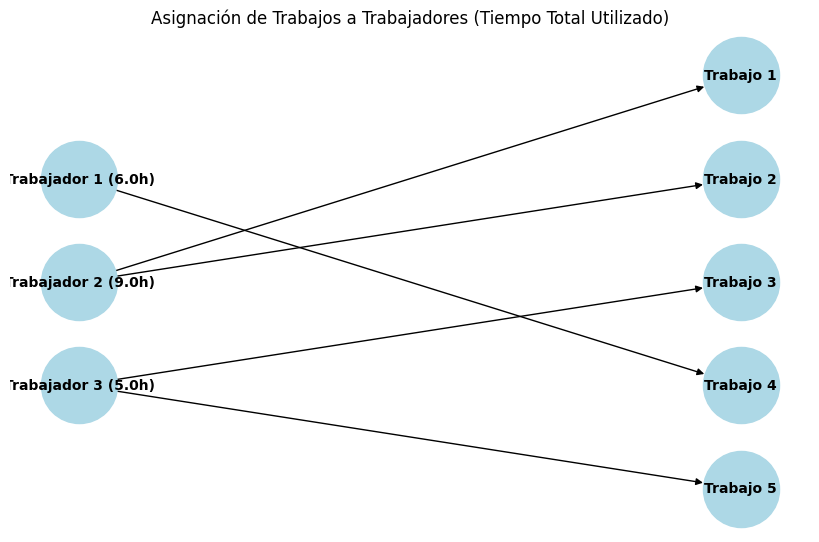

In [28]:
from pyomo.environ import *

class MGanancias:
    def __init__(self, solver_name='glpk'):
        self.solver_name = solver_name
        self.model = None
        self.results = None

    def setup_model(self):
        # Modelo
        self.model = ConcreteModel()

        # Conjuntos
        self.model.i = RangeSet(3)  # Trabajadores
        self.model.j = RangeSet(5)  # Trabajos

        # Parámetros
        trabajadores = {1: 8, 2: 10, 3: 6}
        horas = {1: 4, 2: 5, 3: 3, 4: 6, 5: 2}
        usd = {1: 50, 2: 60, 3: 40, 4: 70, 5: 30}

        self.model.trabajadores = Param(self.model.i, initialize=trabajadores)
        self.model.horas = Param(self.model.j, initialize=horas)
        self.model.usd = Param(self.model.j, initialize=usd)

        # Variable de decisión
        self.model.x = Var(self.model.i, self.model.j, domain=Binary)

        # Restricción 1: Cada trabajador no puede exceder sus horas disponibles
        self.model.res1 = ConstraintList()
        for i in self.model.i:
            self.model.res1.add(sum(self.model.x[i, j] * self.model.horas[j] for j in self.model.j) <= self.model.trabajadores[i])

        # Restricción 2: Cada trabajo debe ser asignado exactamente a un trabajador
        self.model.res2 = ConstraintList()
        for j in self.model.j:
            self.model.res2.add(sum(self.model.x[i, j] for i in self.model.i) == 1)

        # Función objetivo: Maximizar las ganancias
        self.model.obj = Objective(
            expr=sum(self.model.x[i, j] * self.model.usd[j] for i in self.model.i for j in self.model.j),
            sense=maximize
        )

    def solve(self):
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' before solving.")

        # Create the solver instance, explicitly specifying the executable path
        # If glpsol is in a different location, adjust the path accordingly
        solver = SolverFactory('glpk', executable='/usr/bin/glpsol')

        # Check if the solver is available before attempting to solve
        if not solver.available():
            raise RuntimeError("GLPK solver is not available. Please ensure it is installed and the path is correct.")

        # Solve the model
        self.results = solver.solve(self.model)

    def get_results(self):
        print("\nSolución óptima:")
        for i in self.model.i:
            for j in self.model.j:
                if self.model.x[i, j].value == 1:
                    print(f'Trabajador {i} realiza el trabajo {j}')
        ganancia_total = self.model.obj.expr()
        print(f"\nGanancia total obtenida: ${ganancia_total:.2f}")

# Crear el modelo y resolverlo
modelo = MGanancias()
modelo.setup_model()
modelo.solve()
modelo.get_results()

import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.pyplot as plt
import networkx as nx

def plot_results(modelo):
    G = nx.DiGraph()  # Grafo dirigido para representar asignaciones
    pos = {}  # Posiciones para el diagrama
    tiempo_total = {i: 0 for i in modelo.model.i}  # Diccionario para almacenar horas usadas

    # Agregar nodos de trabajadores con tiempo total
    trabajadores = []
    for i in modelo.model.i:
        total_horas = sum(modelo.model.x[i, j].value * modelo.model.horas[j] for j in modelo.model.j if modelo.model.x[i, j].value)
        tiempo_total[i] = total_horas
        trabajador_nombre = f'Trabajador {i} ({total_horas}h)'
        trabajadores.append(trabajador_nombre)
        G.add_node(trabajador_nombre, bipartite=0)
        pos[trabajador_nombre] = (0, -i)

    # Agregar nodos de trabajos
    trabajos = [f'Trabajo {j}' for j in modelo.model.j]
    for j, trabajo in enumerate(trabajos):
        G.add_node(trabajo, bipartite=1)
        pos[trabajo] = (1, -j)

    # Agregar aristas según los resultados
    for i in modelo.model.i:
        for j in modelo.model.j:
            if modelo.model.x[i, j].value == 1:
                trabajador = f'Trabajador {i} ({tiempo_total[i]}h)'
                trabajo = f'Trabajo {j}'
                G.add_edge(trabajador, trabajo)

    # Dibujar el gráfico
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="black", font_size=10, font_weight="bold", arrows=True)
    plt.title("Asignación de Trabajos a Trabajadores (Tiempo Total Utilizado)")
    plt.show()

# Llamar a la función para graficar los resultados
plot_results(modelo)




Solución óptima:
Trabajador 1 realiza el trabajo 1
Trabajador 1 realiza el trabajo 3
Trabajador 2 realiza el trabajo 2
Trabajador 2 realiza el trabajo 5
Trabajador 3 realiza el trabajo 4

Ganancia total obtenida: $250.00


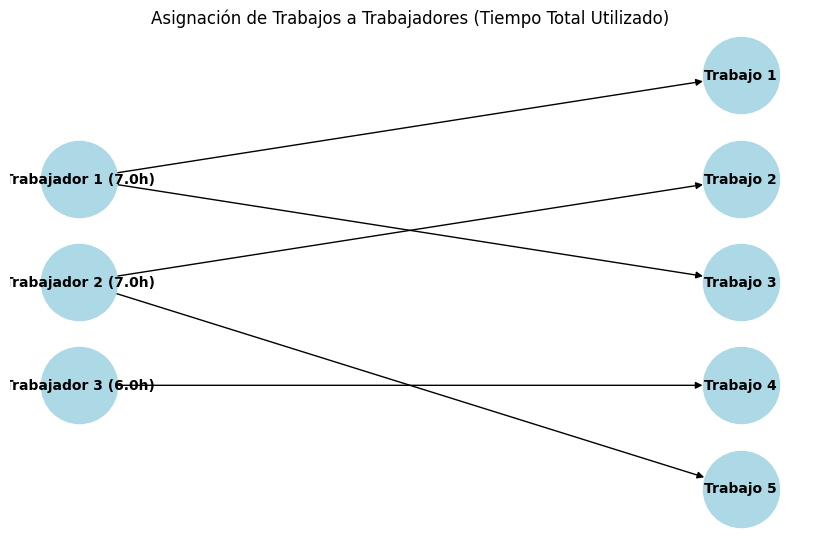

In [30]:
from pyomo.environ import *

class MGanancias:
    def __init__(self, solver_name='glpk'):
        self.solver_name = solver_name
        self.model = None
        self.results = None

    def setup_model(self):
        # Modelo
        self.model = ConcreteModel()

        # Conjuntos
        self.model.i = RangeSet(3)  # Trabajadores
        self.model.j = RangeSet(5)  # Trabajos

        # Parámetros
        trabajadores = {1: 8, 2: 10, 3: 6}
        horas = {1: 4, 2: 5, 3: 3, 4: 6, 5: 2}
        usd = {1: 50, 2: 60, 3: 40, 4: 70, 5: 30}

        self.model.trabajadores = Param(self.model.i, initialize=trabajadores)
        self.model.horas = Param(self.model.j, initialize=horas)
        self.model.usd = Param(self.model.j, initialize=usd)

        # Variable de decisión
        self.model.x = Var(self.model.i, self.model.j, domain=Binary)

        # Restricción 1
        self.model.res1 = ConstraintList()
        for i in self.model.i:
            self.model.res1.add(sum(self.model.x[i, j] * self.model.horas[j] for j in self.model.j) <= self.model.trabajadores[i])

        # Restricción 2
        self.model.res2 = ConstraintList()
        for j in self.model.j:
            self.model.res2.add(sum(self.model.x[i, j] for i in self.model.i) == 1)

        # Restricción 3: Solo el trabajador 1 puede hacer el trabajo 1
        self.model.res3 = ConstraintList()
        for i in self.model.i:
            if i != 1:
                self.model.res3.add(self.model.x[i, 1] == 0)

        # Restricción 4: El trabajador 2 NO puede hacer el trabajo 3
        self.model.res4 = ConstraintList()
        for i in self.model.i:
            if i == 2:
                self.model.res4.add(self.model.x[i, 3] == 0)



        # Función objetivo
        self.model.obj = Objective(
            expr=sum(self.model.x[i, j] * self.model.usd[j] for i in self.model.i for j in self.model.j),
            sense=maximize
        )


    def solve(self):
        if self.model is None:
            raise ValueError("Model is not set up. Please call 'setup_model()' before solving.")

        # Create the solver instance, explicitly specifying the executable path
        # If glpsol is in a different location, adjust the path accordingly
        solver = SolverFactory('glpk', executable='/usr/bin/glpsol')

        # Check if the solver is available before attempting to solve
        if not solver.available():
            raise RuntimeError("GLPK solver is not available. Please ensure it is installed and the path is correct.")

        # Solve the model
        self.results = solver.solve(self.model)

    def get_results(self):
        print("\nSolución óptima:")
        for i in self.model.i:
            for j in self.model.j:
                if self.model.x[i, j].value == 1:
                    print(f'Trabajador {i} realiza el trabajo {j}')
        ganancia_total = self.model.obj.expr()
        print(f"\nGanancia total obtenida: ${ganancia_total:.2f}")

# Crear el modelo y resolverlo
modelo = MGanancias()
modelo.setup_model()
modelo.solve()
modelo.get_results()

import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.pyplot as plt
import networkx as nx

def plot_results(modelo):
    G = nx.DiGraph()  # Grafo dirigido para representar asignaciones
    pos = {}  # Posiciones para el diagrama
    tiempo_total = {i: 0 for i in modelo.model.i}  # Diccionario para almacenar horas usadas

    # Agregar nodos de trabajadores con tiempo total
    trabajadores = []
    for i in modelo.model.i:
        total_horas = sum(modelo.model.x[i, j].value * modelo.model.horas[j] for j in modelo.model.j if modelo.model.x[i, j].value)
        tiempo_total[i] = total_horas
        trabajador_nombre = f'Trabajador {i} ({total_horas}h)'
        trabajadores.append(trabajador_nombre)
        G.add_node(trabajador_nombre, bipartite=0)
        pos[trabajador_nombre] = (0, -i)

    # Agregar nodos de trabajos
    trabajos = [f'Trabajo {j}' for j in modelo.model.j]
    for j, trabajo in enumerate(trabajos):
        G.add_node(trabajo, bipartite=1)
        pos[trabajo] = (1, -j)

    # Agregar aristas según los resultados
    for i in modelo.model.i:
        for j in modelo.model.j:
            if modelo.model.x[i, j].value == 1:
                trabajador = f'Trabajador {i} ({tiempo_total[i]}h)'
                trabajo = f'Trabajo {j}'
                G.add_edge(trabajador, trabajo)

    # Dibujar el gráfico
    plt.figure(figsize=(8, 5))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="black", font_size=10, font_weight="bold", arrows=True)
    plt.title("Asignación de Trabajos a Trabajadores (Tiempo Total Utilizado)")
    plt.show()

# Llamar a la función para graficar los resultados
plot_results(modelo)

